In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# File to Load
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [3]:
# Read the Mouse and Drug Data 
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
mouse_drug_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
# Read the Clinical Trial Data
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)
clinical_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Combine the data into a single dataset called "mouse_clinical_df"
mouse_clinical_df = pd.merge(clinical_trial_data, mouse_drug_data, how='left', on = 'Mouse ID', copy=True)


# Display the data table for preview
mouse_clinical_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [8]:
# Store the Mean Tumor Volume and Standard Error Data Grouped by Drug and Timepoint 
# in a dataframe called "mtv_df"
mtv_df = mouse_clinical_df[['Drug', 'Timepoint', 'Tumor Volume (mm3)']].groupby(by=['Drug', 'Timepoint'], as_index=False).aggregate({'Tumor Volume (mm3)':'mean'})
# Sort the dataframe 
mtv_df.sort_values(by=['Drug', 'Timepoint'], inplace=True)

# Preview DataFrame
mtv_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# in a dataframe called "mtv_serr"
mtv_serr = mouse_clinical_df[['Drug', 'Timepoint', 'Tumor Volume (mm3)']].groupby(by=['Drug', 'Timepoint'], as_index=False).aggregate({'Tumor Volume (mm3)':'sem'})
# Sort the data 
mtv_serr.sort_values(by=['Drug', 'Timepoint'], inplace=True)
# Preview DataFrame
mtv_serr.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [10]:
# Minor Data Munging to Re-Format the Data Frames 
# Create a pivot: 
mtv_pvt = mtv_df.pivot(index='Timepoint', values='Tumor Volume (mm3)', columns = 'Drug')
# Preview the dataframe
mtv_pvt.head(16)



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [11]:
# We need standard errors for the 4 drugs that HW displays: 
drugs_to_display = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
# Limit to the above 4 drugs
std_err = mtv_serr.loc[mtv_serr['Drug'].isin(drugs_to_display), ['Tumor Volume (mm3)']]
#Convert to list that can be passed to plot
std_err_list = std_err['Tumor Volume (mm3)'].tolist()
print(std_err_list)

[0.0, 0.4485928502010377, 0.702684374523893, 0.838617247298569, 0.9097306924832056, 0.8816421535181785, 0.9344595100287, 1.0522408935958147, 1.2236083945982947, 1.2239774547199704, 0.0, 0.2351023043076749, 0.28234591462157144, 0.3577050049753906, 0.4762095134790834, 0.5503145721542007, 0.6310610824580496, 0.9841549374017818, 1.0552196467136123, 1.1444273834537753, 0.0, 0.2648185201672866, 0.35742125637213745, 0.580267965967878, 0.7264838239834723, 0.7554127528910383, 0.9341208698545591, 1.127867175516615, 1.1584488850099004, 1.4531864758425799, 0.0, 0.21809078325219503, 0.40206380730509245, 0.6144614435805992, 0.8396091719248748, 1.0348719877946384, 1.2182311773334498, 1.2874806023058396, 1.3706340409784525, 1.3517255953502085]


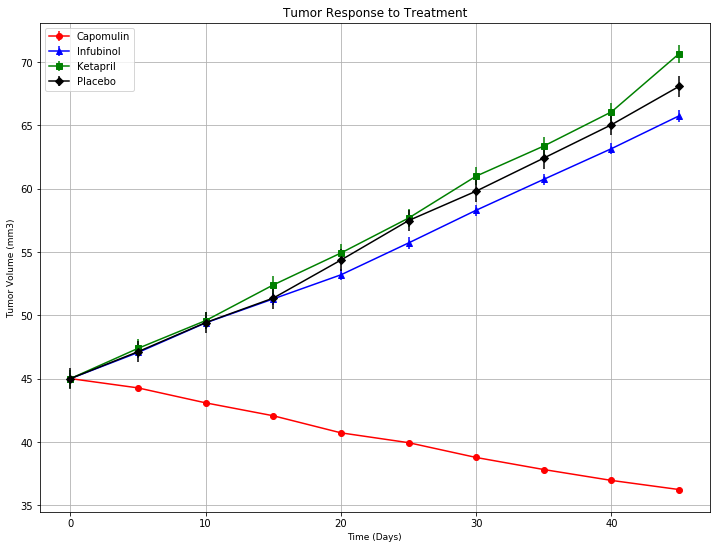

In [28]:
# Generate the Plot (with Error Bars)

fig, ax = plt.subplots()
drugs_to_display = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
#Select colors based on HW charts and define an iterator to go through the list  
colors =itertools.cycle(('red', 'blue', 'green', 'black'))
#Select markers based on HW charts and define an iterator to go through the list 
marker =itertools.cycle(('o', '^', 's', 'D'))
#Use previously created standard error list and define an iterator to go through the list 
yerror = itertools.cycle(std_err_list)
# Plot each curve
for drug in range(len(drugs_to_display)):
    ax = mtv_pvt.plot(ax = ax, y=drugs_to_display[drug], kind='line', color=next(colors), yerr=next(yerror), marker=next(marker), grid=True)
    ax.legend()
# Set figure width to 8 and height to 6
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
plt.title('Tumor Response to Treatment', fontsize=12)
plt.xlabel('Time (Days)', fontsize= 9)
plt.ylabel('Tumor Volume (mm3)', fontsize= 9)
plt.show()
# Save the Figure
fig.savefig('TumorReponse.jpg')

## Metastatic Response to Treatment

In [13]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint in a Dataframe called "mtrr_df"
mtrr_df = mouse_clinical_df[['Drug', 'Timepoint', 'Metastatic Sites']].groupby(by=['Drug', 'Timepoint'], as_index=False).aggregate({'Metastatic Sites':'mean'})
# Sort
mtrr_df.sort_values(by=['Drug', 'Timepoint'], inplace=True)
# Set Drug as index for the dataframe
mtrr_df.set_index('Drug', inplace = True)
#Making a copy for diplay per HW requirements to show only drug name once
mtrr_df_copy = mtrr_df.copy(deep=True)
#Remove the repeated index names as per HW ask: 
mtrr_df_copy.index = mtrr_df_copy.index.where(~mtrr_df_copy.index.duplicated(),[' '])
# Preview DataFrame
mtrr_df_copy.head()

,Timepoint,Metastatic Sites
Drug,,
Capomulin,0,0.000000
,5,0.160000
,10,0.320000
,15,0.375000
,20,0.652174


In [14]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint in a dataframe "mtrr_serr"
mtrr_serr = mouse_clinical_df[['Drug', 'Timepoint', 'Metastatic Sites']].groupby(by=['Drug', 'Timepoint'], as_index=False).aggregate({'Metastatic Sites':'sem'})
# Sort the data 
mtrr_serr.sort_values(by=['Drug', 'Timepoint'], inplace=True)
#Set Drug as index
mtrr_serr.set_index('Drug', inplace = True)
#Making a copy for diplay per HW requirements to show only drug name once
mtrr_serr_copy = mtrr_serr.copy(deep=True)
#Remove the repeated drug name as per HW requirements 
mtrr_serr_copy.index = mtrr_serr_copy.index.where(~mtrr_serr_copy.index.duplicated(),[' '])
# Preview DataFrame
mtrr_serr_copy.head()


,Timepoint,Metastatic Sites
Drug,,
Capomulin,0,0.000000
,5,0.074833
,10,0.125433
,15,0.132048
,20,0.161621


In [15]:
# Minor Data Munging to Re-Format the Data Frames 
mtrr_df = mouse_clinical_df[['Drug', 'Timepoint', 'Metastatic Sites']].groupby(by=['Drug', 'Timepoint'], as_index=False).aggregate({'Metastatic Sites':'mean'})
# Sort the data 
mtrr_df.sort_values(by=['Drug', 'Timepoint'], inplace=True)
# Convert to DataFrame as a pivot
mtrr_pvt = mtrr_df.pivot(index='Timepoint', values = 'Metastatic Sites', columns = 'Drug')
# Preview that Reformatting worked
mtrr_pvt.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [16]:
# For the 4 drugs to be displayed, create a smaller dataframe 
drugs_to_display = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
std_err2 = mtrr_serr.loc[mtrr_serr.index.isin(drugs_to_display), ['Metastatic Sites']]
# Extract the standard errors for the 4 drugs as a list for the error bars for the plot
std_err_list2 = std_err2['Metastatic Sites'].tolist()
print(std_err_list2)

[0.0, 0.07483314773547882, 0.12543258481484518, 0.13204769669668062, 0.16162093517992787, 0.18181818181818182, 0.17294358749297126, 0.1694958610428735, 0.1756103706151026, 0.20259092748745378, 0.0, 0.0916515138991168, 0.15936381457791918, 0.19401475035679397, 0.23480114767046698, 0.26575279135832647, 0.22782254977690686, 0.2247332874877474, 0.31446603773522014, 0.30932024237944566, 0.0, 0.09810018692482893, 0.14201839569111904, 0.1913809142918546, 0.23667960637249194, 0.2882750302658769, 0.3474672338172563, 0.36141781551307367, 0.31572541817620525, 0.2787219948501072, 0.0, 0.10094660663590604, 0.11526067913468745, 0.19022147756317048, 0.23406428182677777, 0.26388762419009354, 0.30026443372256084, 0.3414117886352963, 0.2972941950052816, 0.30424000964875475]


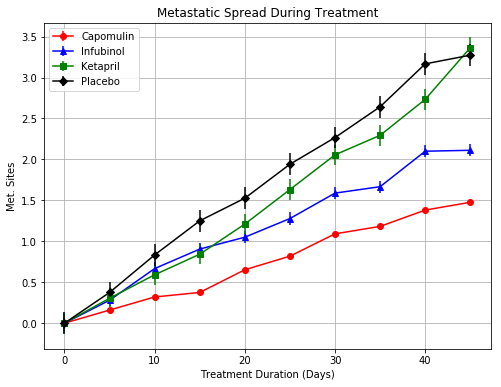

In [29]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure
fig, ax = plt.subplots()
# Limit charts to 4 drugs per HW
drugs_to_display = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
#Select colors based on HW charts and define an iterator to go through the list  
colors =itertools.cycle(('red', 'blue', 'green', 'black'))
#Select markers based on HW charts and define an iterator to go through the list 
marker =itertools.cycle(('o', '^', 's', 'D'))
#Use previously created standard error list and define an iterator to go through the list 
yerror2 = itertools.cycle(std_err_list2)
#generate the plot
for drug in range(len(drugs_to_display)):
    ax = mtrr_pvt.plot(ax = ax, y=drugs_to_display[drug], kind='line', color=next(colors), yerr= next(yerror2), marker=next(marker), grid=True)
    ax.legend()
# Set figure width to 8 and height to 6
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
plt.title('Metastatic Spread During Treatment', fontsize=12)
plt.xlabel('Treatment Duration (Days)', fontsize= 10)
plt.ylabel('Met. Sites', fontsize= 10)
plt.show()
# Save the Figure
fig.savefig('MetastaticSpread.jpg')
plt.show()

## Survival Rates

In [18]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)& convert to DataFrame mtmc_df
mtmc_df = mouse_clinical_df[['Drug', 'Timepoint', 'Mouse ID']].groupby(by=['Drug', 'Timepoint'], as_index=False).aggregate({'Mouse ID':'nunique'})
# Sort 
mtmc_df.sort_values(by=['Drug', 'Timepoint'], inplace=True)
# Preview DataFrame
mtmc_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [19]:
# Minor Data Munging to Re-Format the Data Frames to crete the pivot
mtmc_pvt = mtmc_df.pivot(index='Timepoint', values='Mouse ID', columns = 'Drug')

# Preview the Data Frame
mtmc_pvt.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


In [20]:
# Convert the data to percentages by copying the previous dataframe
mtmc_pvt_copy = mtmc_pvt.copy(deep=True)
mtmc_pvt_copy = (mtmc_pvt_copy/25)*100
#Preview the dataframe with % 
mtmc_pvt_copy.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.0,100.0,96.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.0,96.0,88.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,64.0,96.0,88.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,64.0,92.0,80.0,68.0


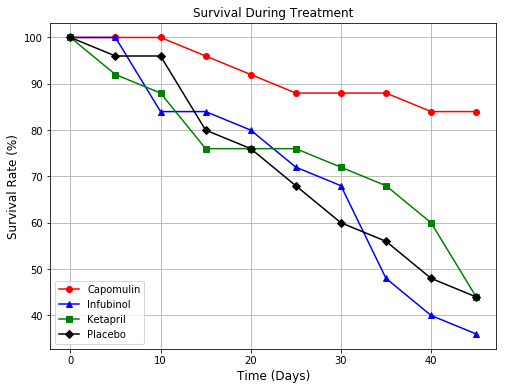

In [30]:
# Generate the Plot (Accounting for percentages)

fig, ax = plt.subplots()

#Drugs to display based on HW requirements
drugs_to_display = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
#Select colors based on HW charts and define an iterator to go through the list 
colors =itertools.cycle(('red', 'blue', 'green', 'black'))
#Select markers based on HW charts and define an iterator to go through the list 
marker =itertools.cycle(('o', '^', 's', 'D'))
#plot the figure 
for drug in range(len(drugs_to_display)):
    ax = mtmc_pvt_copy.plot( ax = ax,  y=drugs_to_display[drug], kind='line', color=next(colors), marker=next(marker), grid=True)
    ax.legend(loc='lower left')
# Set figure width to 8 and height to 6
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
plt.title('Survival During Treatment', fontsize=12)
plt.xlabel('Time (Days)', fontsize= 12)
plt.ylabel('Survival Rate (%)', fontsize= 12)
plt.show()
# Save the Figure
fig.savefig('SurvivalDuringTreatment.jpg')
plt.show()

## Summary Bar Graph

In [31]:
# Calculate the percent changes for each drug
# Get the 1st & last rows
pct_df = mtv_pvt.iloc[[0,9]]
#Create holders to handle the data 
pct_ch_dict = {}
pct_chg_list = []
drug_name = []
pass_drugs_dict = {}
fail_drugs_dict = {}
#Iterate through all drugs and calculate the % 
for drug in range(len(pct_df.columns)):
    a = pct_df.iloc[0,drug]
    b = pct_df.iloc[1, drug]
    c = ((b-a)/a)*100
    colname = pct_df.columns[drug]
    pct_chg_list.append(c)
    drug_name.append(colname)
    if c > 0:
        pass_drugs_dict[colname] = c
    else:
        fail_drugs_dict[colname] = c

pct_ch_dict = dict(zip(drug_name, pct_chg_list))
# Preview the data 
pct_ch_dict

{'Capomulin': -19.475302667894173,
 'Ceftamin': 42.516491855897414,
 'Infubinol': 46.12347172785184,
 'Ketapril': 57.028794686606076,
 'Naftisol': 53.92334713476923,
 'Placebo': 51.29796048315153,
 'Propriva': 47.24117486320634,
 'Ramicane': -22.320900462766673,
 'Stelasyn': 52.08513428789896,
 'Zoniferol': 46.57975086509525}

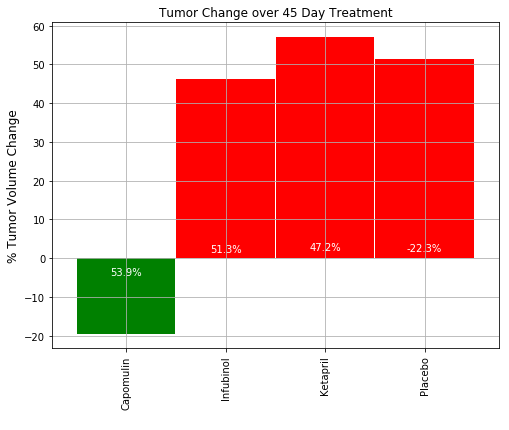

In [33]:
# Store all Relevant Percent Changes into a dataframe 
d = {'Drug': list(pct_ch_dict.keys()), 'Pct Change' : list(pct_ch_dict.values())}
pct_df = pd.DataFrame(data=d)
pct_df.set_index('Drug', inplace = True)
#Linit to the 4 drugs per HW 
drugs_to_display = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
#Get them into a dataframe
tum_chg_df = pct_df.loc[pct_df.index.isin(drugs_to_display), ['Pct Change']]
# Show red for decrease and green for positive 
colors = tuple(np.where(tum_chg_df["Pct Change"]>0, 'r', 'g'))
#Generate the bar plot 
ax = tum_chg_df.plot(kind='bar', stacked=True, grid=True, width = 0.99, color = colors, legend = False)

#Define a function for placing the labels as per HW requrements 

def add_value_labels(ax, pct_chg_list, spacing= 5):
    #Add labels to the end of each bar in a bar chart.
    #Arguments:
    #ax (matplotlib.axes.Axes): The matplotlib object containing the axes of the plot to annotate.
    #label values to place 
    # spacing (int): The distance between the labels and the bars
    
# For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()/20
        x_value = rect.get_x() + rect.get_width() / 2
        n =0

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'top'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

       
        # Use the label values to extract each label & format 
        label = "{:.1f}%".format(pct_chg_list.pop(n))
        n= n+1

            # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,                      # Vertically align label differently for positive and negative values.
            color = "white")


# Call the function above. All the magic happens there.
add_value_labels(ax, pct_chg_list)

# Set figure width to 8 and height to 6
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
plt.title('Tumor Change over 45 Day Treatment', fontsize=12)
plt.xlabel(' ')
plt.ylabel('% Tumor Volume Change', fontsize= 12)
plt.show()
# Save the Figure
fig.savefig('TumorChange45Days.jpg')
plt.show()